In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [2]:
df= pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
from sklearn.model_selection import train_test_split

'''X= df.drop(['Purchased'], axis =1)
col= ['Purchased']
y= df[col] '''
X= df.iloc[:, [0, 1]].values
y= df.iloc[:, 2].values

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 1)

In [6]:
clf= SVC(kernel= 'linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
y_pred= clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

cm= confusion_matrix(y_test, y_pred)
cm

array([[65,  7],
       [15, 33]], dtype=int64)

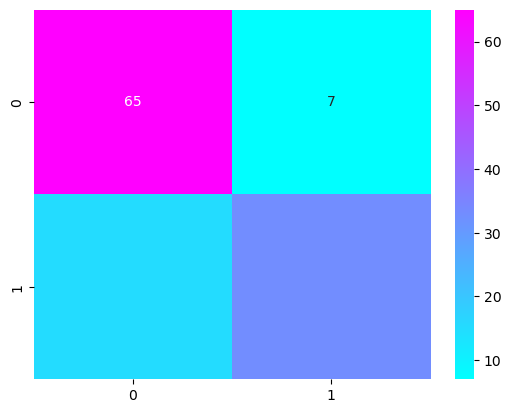

In [9]:
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'cool')
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86        72
           1       0.82      0.69      0.75        48

    accuracy                           0.82       120
   macro avg       0.82      0.80      0.80       120
weighted avg       0.82      0.82      0.81       120

